### Import Libraries and Data

In [ ]:
!pip install pandas==1.2.5
!pip install pandas_profiling==2.7.1
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 48.7 MB/s 
     |████████████████████████████████| 16.7 MB 45.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

### Playing around with data

In [ ]:
raw_data = pd.read_excel('drive/MyDrive/Virtual Internships/ANZ synthesised transaction dataset.xlsx')

nan_missing_constant_columns = ['currency', 'merchant_code', 'bpay_biller_code', 'country']
data1 = raw_data.drop(nan_missing_constant_columns, axis = 1)
print('Number of customers:', np.unique(data1['account']).shape[0])
print('Number of transactions:', data1.shape[0])

Number of customers: 100
Number of transactions: 12043


In [ ]:
pandas_profiling.ProfileReport(data1)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'Total amount')

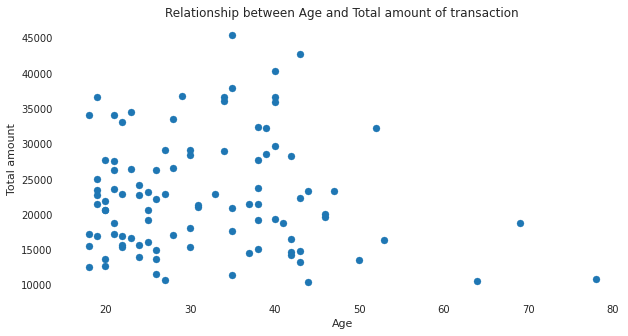

In [ ]:
age_and_amount = data1.groupby(['account', 'age'], as_index = False)['amount'].sum()

plt.figure(figsize = (10, 5))
plt.scatter(age_and_amount['age'], age_and_amount['amount'])
plt.title('Relationship between Age and Total amount of transaction')
plt.xlabel('Age')
plt.ylabel('Total amount')


In general, people who are from 19 to 45 make more transactions than people who are above 45.

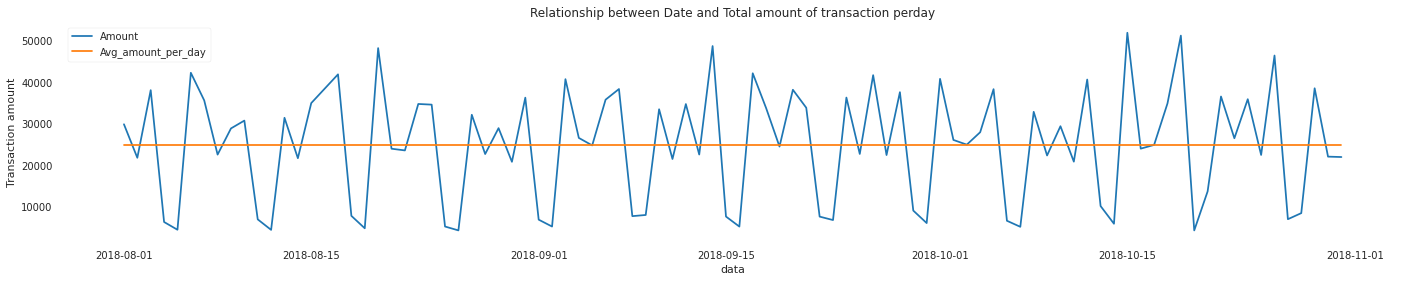

In [ ]:
date_and_amount = data1.groupby(['date'], as_index = False)['amount'].sum()
date_and_amount['Avg_amount_per_day'] = sum(date_and_amount['amount']) / len(date_and_amount)

plt.figure(figsize = (24, 4))
plt.plot(date_and_amount['date'], date_and_amount['amount'], label = 'Amount')
plt.plot(date_and_amount['date'], date_and_amount['Avg_amount_per_day'], label = 'Avg_amount_per_day')
plt.xlabel('data')
plt.ylabel('Transaction amount')
plt.title('Relationship between Date and Total amount of transaction perday')
plt.legend()

The total amount of transaction per day is periodic

Text(0, 0.5, 'Total amount')

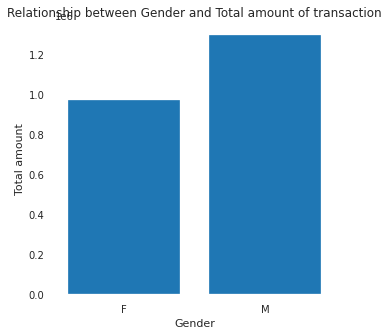

In [ ]:
gender_and_amount = data1.groupby(['gender'], as_index = False)['amount'].sum()

plt.figure(figsize = (5, 5))
plt.bar(gender_and_amount['gender'], gender_and_amount['amount'])
plt.title('Relationship between Gender and Total amount of transaction')
plt.xlabel('Gender')
plt.ylabel('Total amount')

Males make more transactions than females on average

### Feature engineering

In [ ]:
raw_data = pd.read_excel('drive/MyDrive/Virtual Internships/ANZ synthesised transaction dataset (1).xlsx')
print(raw_data.shape)
raw_data.head()

(12043, 23)


status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

In [ ]:
raw_data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [ ]:
irrelevant_attributes = ['currency', 'merchant_code', 'bpay_biller_code', 'country', 'merchant_id', 'card_present_flag',
                         'merchant_suburb', 'merchant_state', 'merchant_long_lat', 'extraction', 'transaction_id', 'date']

relevant_attributes = ['status', 'account', 'long_lat', 'txn_description', 'gender', 'age', 
                       'customer_id', 'movement', 'balance', 'first_name', 'amount']

print(len(irrelevant_attributes) + len(relevant_attributes))

# Remove 'duplicate' attributes ()

relevant_attributes = ['status', 'account', 'long_lat', 'txn_description', 'gender', 'age', 
                       'movement', 'balance', 'amount']

23


In [ ]:
data1 = raw_data[relevant_attributes]
data2 = data1[data1['txn_description'] == 'PAY/SALARY']
data2

status         account       long_lat txn_description gender  age  \
50     posted   ACC-588564840  151.27 -33.76      PAY/SALARY      M   23   
61     posted  ACC-1650504218  145.01 -37.93      PAY/SALARY      F   23   
64     posted  ACC-3326339947  151.18 -33.80      PAY/SALARY      M   22   
68     posted  ACC-3541460373  145.00 -37.83      PAY/SALARY      M   24   
70     posted  ACC-2776252858  144.95 -37.76      PAY/SALARY      F   43   
...       ...             ...            ...             ...    ...  ...   
11995  posted  ACC-1973887809  115.78 -31.90      PAY/SALARY      M   26   
12000  posted   ACC-819621312  145.04 -37.85      PAY/SALARY      F   30   
12001  posted  ACC-2920611728  144.96 -37.76      PAY/SALARY      M   69   
12003  posted  ACC-1799207998  150.68 -33.79      PAY/SALARY      F   20   
12004  posted  ACC-2171593283  146.94 -36.04      PAY/SALARY      M   19   

      movement   balance   amount  
50      credit   8342.11  3903.95  
61      credit   2040.58  1626.48  
64      credit   3158.51   983.36  
68      credit   2517.66  1408.08  
70      credit   2271.79  1068.04  
...        ...       ...      ...  
11995   credit   9378.51  1098.91  
12000   credit   3440.01  1158.15  
12001   credit  11381.44  1043.12  
12003   credit  11454.52  1395.49  
12004   credit  19893.45  2639.76  

[883 rows x 9 columns]

In [ ]:
unique_accounts = np.unique(data2['account'])

for account in unique_accounts:
    for attribute in ['status', 'long_lat',	'gender', 'age', 'movement', 'balance', 'amount']:
        if len(np.unique(data2[data2['account'] == account][attribute])) != 1:
            print(attribute)
        else: 
            pass

balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance
balance


In [ ]:
data3 = np.empty((len(unique_accounts), len(relevant_attributes) + 4))
data3 = pd.DataFrame(data3, columns = ['account', 'status', 'long_lat', 'txn_description', 'longitude', 'latitude',
                                       'gender', 'age', 'movement', 'balance', 'amount', 'total_amount_3_months', 'annual_salary'])

for i in range(len(data3)):
    for attribute in ['status', 'long_lat', 'txn_description', 'gender', 'age', 'movement', 'amount']:
        data3[attribute][i] = np.unique(data2[data2['account'] == unique_accounts[i]][attribute])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data3['account'] = unique_accounts
data3['balance'] = data2.groupby(['account'], as_index = False)['balance'].mean()['balance']
data3['total_amount_3_months'] = data2.groupby(['account'], as_index = False)['amount'].sum()['amount']
data3['annual_salary'] = data3['total_amount_3_months'] * 4

data3.head()

account  status       long_lat txn_description      longitude  \
0  ACC-1037050564  posted  153.10 -27.66      PAY/SALARY   0.000000e+00   
1  ACC-1056639002  posted  145.03 -37.91      PAY/SALARY   0.000000e+00   
2  ACC-1199531521  posted  116.02 -31.87      PAY/SALARY  2.122028e-314   
3  ACC-1217063613  posted  147.61 -37.82      PAY/SALARY  5.453529e-312   
4  ACC-1222300524  posted  151.23 -33.94      PAY/SALARY   0.000000e+00   

        latitude gender   age movement       balance   amount  \
0   0.000000e+00      F  40.0   credit   3959.400000   892.09   
1   0.000000e+00      M  22.0   credit  49718.081667  3195.01   
2   0.000000e+00      M  52.0   credit  12414.007143  3785.78   
3  5.453612e-312      F  27.0   credit   6884.815000  4863.62   
4   0.000000e+00      M  38.0   credit   1755.892308  1002.13   

   total_amount_3_months  annual_salary  
0               11597.17       46388.68  
1               19170.06       76680.24  
2               26500.46      106001.84  
3                9727.24       38908.96  
4               13027.69       52110.76

In [ ]:
for i in range(len(data3)):
    data3['longitude'][i] = float(data3['long_lat'][i][:5])
    data3['latitude'][i] = float(data3['long_lat'][i][-5:])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data4 = pd.get_dummies(data = data3, columns = ['gender'], prefix = None)
data4 = data4.drop(['account', 'status', 'long_lat', 'txn_description', 'movement', 
                    'gender_M', 'amount', 'total_amount_3_months'], axis = 1)
data4.head()

longitude  latitude   age       balance  annual_salary  gender_F
0      153.1     27.66  40.0   3959.400000       46388.68         1
1      145.0     37.91  22.0  49718.081667       76680.24         0
2      116.0     31.87  52.0  12414.007143      106001.84         0
3      147.6     37.82  27.0   6884.815000       38908.96         1
4      151.2     33.94  38.0   1755.892308       52110.76         0

In [ ]:
pandas_profiling.ProfileReport(data4)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Users' locations

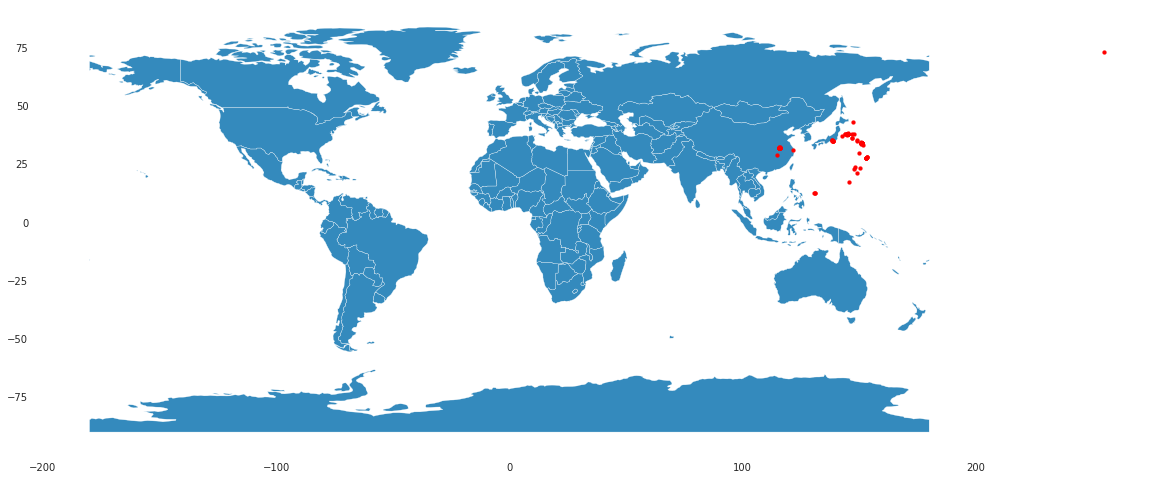

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data4['longitude'], data4['latitude'])]
gdf = GeoDataFrame(data4, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='red', markersize=15);

# there is an outlier at the top right corner.

### Prepared Data and a brief summary

In [ ]:
data4.head()

longitude  latitude   age       balance  annual_salary  gender_F
0      153.1     27.66  40.0   3959.400000       46388.68         1
1      145.0     37.91  22.0  49718.081667       76680.24         0
2      116.0     31.87  52.0  12414.007143      106001.84         0
3      147.6     37.82  27.0   6884.815000       38908.96         1
4      151.2     33.94  38.0   1755.892308       52110.76         0

In [ ]:
data4.to_csv('data4.csv')

Apperently the annual salary does not heavily depend on the given attributes. Balance and gender might be the strongest factors (among the given attributes).

Let's move to R!

### draft

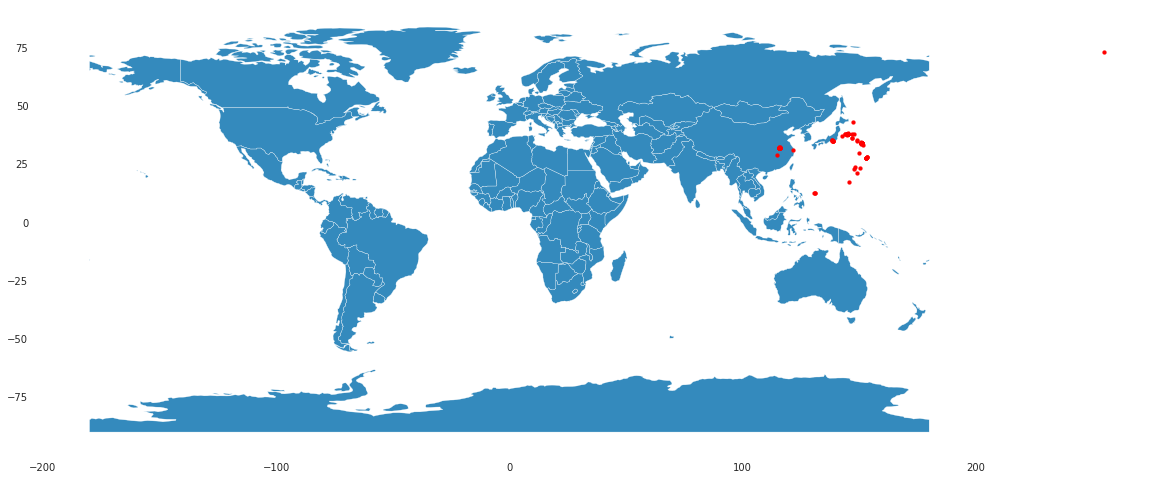